# imports

In [16]:
import pandas as pd
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt; plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns; sns.set_theme(font='Malgun Gothic')

import warnings; warnings.filterwarnings(action='ignore')
pd.set_option('display.max_rows', 100, 'display.max_columns', 100, 'max_colwidth', None)

# Neural Network

## iris : multi label

### read

In [14]:
from sklearn.datasets import load_iris

iris = pd.DataFrame(load_iris()['data'], columns=load_iris()['feature_names'])
iris['target'] = load_iris()['target']

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [18]:
X = iris.drop('target', axis=1)
y = iris['target']

### modeling

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

tf.random.set_seed(0)

In [33]:
X.shape

(150, 4)

In [66]:
model = Sequential()

model.add(Dense(units=16, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [67]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_48 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_49 (Dense)             (None, 3)                 27        
Total params: 315
Trainable params: 315
Non-trainable params: 0
_________________________________________________________________


In [68]:
filepath = './models/iris_{epoch:03d}_{val_loss:.4f}.h5'

callbacks = [
    EarlyStopping(monitor='val_loss', patience=20), 
    ModelCheckpoint(
        filepath=filepath, monitor='val_loss', 
        save_best_only=True, 
    )
]

In [69]:
history = model.fit(
    X, y, 
    batch_size=100, 
    epochs=200, 
    callbacks=callbacks, 
    validation_split=0.2, 
    validation_batch_size=100, 
)

Epoch 1/200
2/2 [==============================] - 1s 212ms/step - loss: 1.1991 - accuracy: 0.4167 - val_loss: 2.4957 - val_accuracy: 0.0000e+00
Epoch 2/200
2/2 [==============================] - 0s 44ms/step - loss: 1.1811 - accuracy: 0.4167 - val_loss: 2.4567 - val_accuracy: 0.0000e+00
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 1.1658 - accuracy: 0.4167 - val_loss: 2.3889 - val_accuracy: 0.0000e+00
Epoch 4/200
2/2 [==============================] - 0s 26ms/step - loss: 1.1532 - accuracy: 0.4167 - val_loss: 2.3129 - val_accuracy: 0.0000e+00
Epoch 5/200
2/2 [==============================] - 0s 24ms/step - loss: 1.1421 - accuracy: 0.4167 - val_loss: 2.2373 - val_accuracy: 0.0000e+00
Epoch 6/200
2/2 [==============================] - 0s 26ms/step - loss: 1.1328 - accuracy: 0.4167 - val_loss: 2.1810 - val_accuracy: 0.0000e+00
Epoch 7/200
2/2 [==============================] - 0s 28ms/step - loss: 1.1223 - accuracy: 0.4167 - val_loss: 2.1511 - val_accuracy: 0.

In [70]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

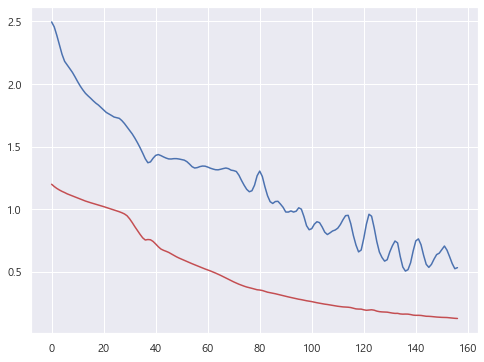

In [75]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
acc        = history.history['accuracy']
val_acc    = history.history['val_accuracy']

f, ax = plt.subplots(figsize=(8, 6))
plt.plot(np.arange(len(train_loss)), train_loss, c='r', label='train')
plt.plot(np.arange(len(train_loss)), val_loss, c='b', label='val')

# plt.plot(np.arange(len(train_loss)), train_loss, c='r', label='train')
# plt.plot(np.arange(len(train_loss)), val_loss, c='b', label='val')



# plt.legend(); plt.show()

# CNN